In [1]:
from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal

import pylab
import numpy as np

In [2]:
def f(x):
    return (x - 1)**4 + 8 * (x - 1)**2 + 1
def df(x):
    return 4 * (x - 1)**3 + 16 * (x - 1)
def d2f(x):
    return 12 * (x - 1)**2 + 16

In [3]:
def newtons_method(f, df, x0, es):
    ea = abs(0 - f(x0))
    while ea > es:
        x0 -= f(x0) / df(x0)
        ea = abs(0 - f(x0))
    print("My newtons_method optimization value :", x0)
    return x0

In [4]:
def test_with_scipy(f, df, x0, es):
    my_newton = newtons_method(df, d2f, x0, es)
    scipy_newton = newton(df, x0, d2f, tol=es)
    print("scipy_newton optimization value :", scipy_newton)
    assert_almost_equal(my_newton, scipy_newton, decimal=5)
    print("Tests passed.\n")
    pylab.plot(scipy_newton, f(scipy_newton), 'o')

My newtons_method optimization value : 1.0
scipy_newton optimization value : 1.0
Tests passed.



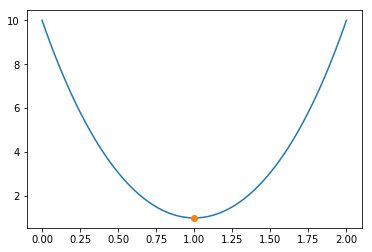

In [5]:
if __name__ == '__main__':
    x = np.linspace(0, 2, 100)
    y = f(x)
    pylab.plot(x, y)
    
    x0 = 3
    test_with_scipy(f, df, x0, 1e-5)
    pylab.show()